In [1]:
import tensorflow as tf
from os import path, getcwd, chdir
import numpy as np
import matplotlib.pyplot as plt

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab mnist.npz from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = "mnist.npz"

In [2]:
# GRADED FUNCTION: train_mnist

# Please write your code only where you are indicated.
# please do not remove # model fitting inline comments.

# YOUR CODE SHOULD START HERE
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
    #creating a callback function that activates if the accuracy is greater than 60%
        if(logs.get('accuracy')>0.99):
            print("\nim maxed out baby, too goated!")
            self.model.stop_training = True
# YOUR CODE SHOULD END HERE

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)

# YOUR CODE SHOULD START HERE
callbacks = myCallback()
x_train = x_train / 255.0
x_train = x_train.reshape(60000, 28, 28, 1)

x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test / 255.0

# YOUR CODE SHOULD END HERE
model = tf.keras.models.Sequential([
    #convolution part
    # creates a convolution layer with 64 filters with 3 by 3 dimensions
    # sets activation function to relu, with drops all negative values 
    # sets input shape to 28 by 28 array, same as before, 1 denotes that the image is gray-scale, only 1 color channel
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    
    # create a max pooling layer with a 2 by 2 pooling filter
    # means that the largest pixel value with be chosen out of every 4 pixels
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # insert another set of convolutions and pooling so that the network can learn another set of convolutions
    # then pooling layer is added so that the images can get smaller again
    # this reduces number of dense layers needed
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    
    #deep neural network part
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model fitting
history = model.fit(# YOUR CODE SHOULD START HERE
    x_train, y_train, epochs=10, callbacks=[callbacks]
          # YOUR CODE SHOULD END HERE
)
model.evaluate(x_train, y_train)

In [45]:
predictions = model.predict(x_test)
class_names = [0,1,2,3,4,5,6,7,8,9]

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    new_img = np.reshape(img, (28, 28))
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(new_img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [46]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])  
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

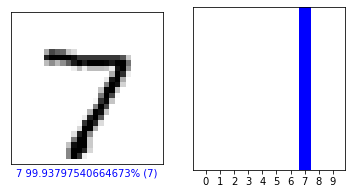

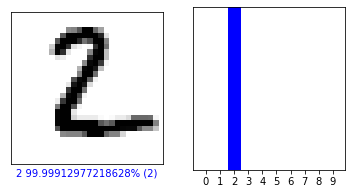

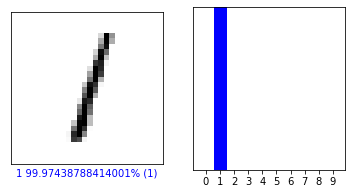

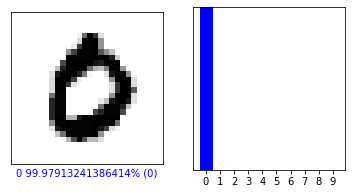

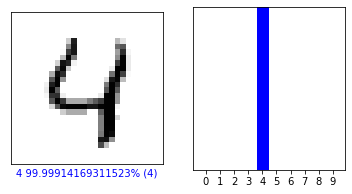

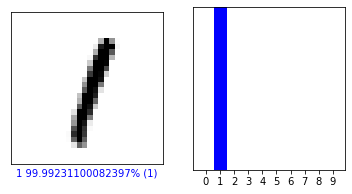

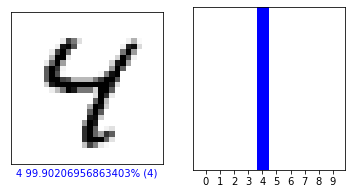

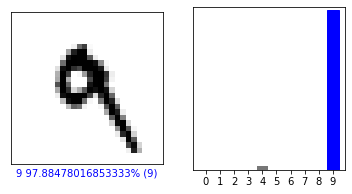

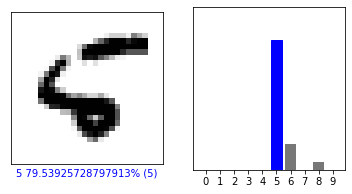

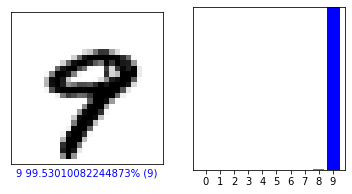

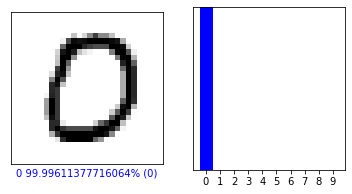

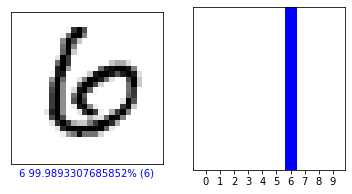

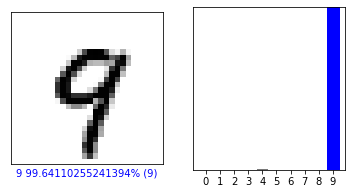

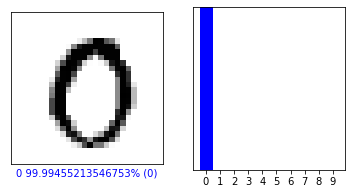

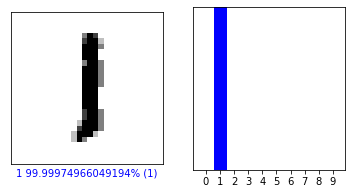

In [47]:
for i in range(15):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], y_test, x_test)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  y_test)
    plt.show()